# Text data Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [5]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [6]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [7]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


### practical example

In [8]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    218      0 --:--:-- --:--:-- --:--:--   219

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  3  488k    3 15234    0     0   7620      0  0:01:05  0:00:01  0:01:04  7620
100  488k  100  488k    0     0   223k      0  0:00:02  0:00:02 --:--:-- 2493k


In [9]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

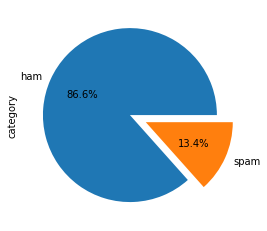

In [12]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [13]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [15]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [16]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [25]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [26]:
spam_sms.values.shape

(747,)

In [27]:
!pip install nltk

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kwctl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kwctl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [30]:
len(spam_words)

9411

In [31]:
!pip install wordcloud

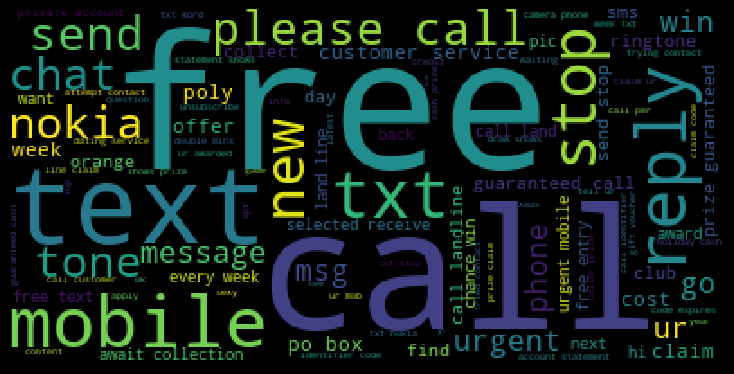

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

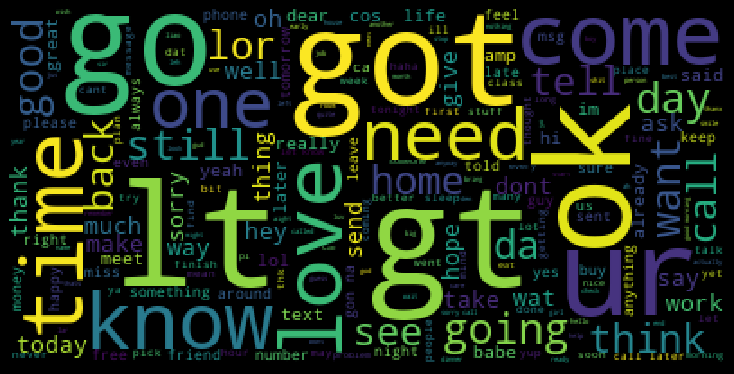

In [33]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [34]:
!pip install gensim

In [35]:
from gensim.models.word2vec import Word2Vec

In [36]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [37]:
model = Word2Vec(sentences, min_count=1, size=5)

In [38]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [39]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [40]:
model['sentence','this']

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.02611624, -0.05058116, -0.00805411,  0.09692308, -0.09342711],
       [ 0.0765151 ,  0.07917839, -0.00418491,  0.03491455, -0.02727685]],
      dtype=float32)

In [41]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [42]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [43]:
result

array([[-0.06579531,  0.02142279],
       [-0.06787788, -0.0117901 ],
       [-0.04953152,  0.06397931],
       [-0.04395817, -0.0377215 ],
       [ 0.09087861,  0.0259433 ],
       [ 0.12025947,  0.00675885],
       [-0.10012168,  0.09727588],
       [ 0.12707192, -0.01240656],
       [-0.03834494, -0.04954012],
       [-0.07440124, -0.00486926],
       [ 0.08446003,  0.08598903],
       [-0.07520894, -0.06447662],
       [ 0.06984336, -0.02903951],
       [ 0.02272627, -0.0915255 ]], dtype=float32)

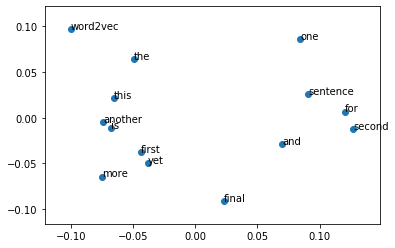

In [44]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [45]:
model[words]

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.0765151 ,  0.07917839, -0.00418491,  0.03491455, -0.02727685],
       [ 0.059647  , -0.02059848, -0.0203613 ,  0.01274525,  0.0650022 ],
       [ 0.05793314,  0.0165161 ,  0.07313432,  0.03575017,  0.01566155],
       [ 0.0270453 ,  0.04650258, -0.07945371,  0.02902518, -0.00387505],
       [ 0.02611624, -0.05058116, -0.00805411,  0.09692308, -0.09342711],
       [-0.02039789, -0.09611996,  0.01347443,  0.06736353, -0.0840878 ],
       [ 0.05429218,  0.06591973,  0.06110331,  0.06884307,  0.06970115],
       [-0.07545426, -0.09701129, -0.02917634,  0.07892886, -0.05326854],
       [-0.0254801 ,  0.04468166,  0.02629289, -0.06774767, -0.02652977],
       [ 0.01917711,  0.00651196, -0.04615857,  0.03777291,  0.08917638],
       [-0.01918447, -0.01559377,  0.07768708,  0.09940739, -0.08474161],
       [ 0.0456949 ,  0.02694528, -0.01162982, -0.06522579,  0.00335929],
       [-0.03858852, -0.01968672, -0.01959082,  0.02915237, -0.08133304],
       [ 0.04999913, -0.057706  , -0.0

In [46]:
model.most_similar('word2vec')

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('the', 0.8327771425247192),
 ('this', 0.5640552043914795),
 ('another', 0.47617411613464355),
 ('is', 0.4490736126899719),
 ('one', 0.16344842314720154),
 ('first', 0.09765826165676117),
 ('more', -0.05818048119544983),
 ('sentence', -0.1069345474243164),
 ('yet', -0.250681072473526),
 ('for', -0.37296852469444275)]

In [47]:
model.similarity('sentence', 'word2vec')

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.10693458